In [1]:
%load_ext autoreload
%autoreload 2

# Ruggedness metric for circuits

Guiding questions
1. How stable is a circuit topology?
2. How quickly do mutations degrade a circuit's function?
3. 

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('../data/raw/summarise_simulation/2024_11_27_145142/tabulated_mutation_info.csv')

In [29]:
data['Log sensitivity'] = np.log10(data['sensitivity_wrt_species-6'])
first_numbers = (data.sort_values('mutation_num')
                      .groupby(['circuit_name', 'sample_name'])['Log sensitivity']
                      .transform('first'))

data['Sensitivity difference'] = data['Log sensitivity'] - first_numbers

data[['Sensitivity difference', 'Log sensitivity', 'circuit_name', 'mutation_num', 'sample_name']].iloc[:10]

,Sensitivity difference,Log sensitivity,circuit_name,mutation_num,sample_name
0,0.000000,0.000000,toy_mRNA_circuit_0,0,RNA_0
1,0.000000,-1.011431,toy_mRNA_circuit_0,0,RNA_1
2,0.000000,-3.621418,toy_mRNA_circuit_0,0,RNA_2
3,0.000000,0.000000,toy_mRNA_circuit_0,1,RNA_0
4,0.261296,-0.750135,toy_mRNA_circuit_0,1,RNA_1
5,-0.111589,-3.733006,toy_mRNA_circuit_0,1,RNA_2
6,0.000000,0.000000,toy_mRNA_circuit_0,1,RNA_0
7,0.105053,-0.906378,toy_mRNA_circuit_0,1,RNA_1
8,-0.037523,-3.658940,toy_mRNA_circuit_0,1,RNA_2
9,0.000000,0.000000,toy_mRNA_circuit_0,1,RNA_0


In [38]:
def bin_array(array, n_bins):
    bins = np.linspace(array.min(), array.max(), n_bins + 1)
    bin_indices = np.digitize(array, bins) - 1
    return bin_indices


first_numbers['Log sensitivity binned'] = bin_array(first_numbers['Log sensitivity'], 10)

,Log sensitivity,Log sensitivity binned
1409967,0.000000,10
1409968,-3.495462,3
1409969,-3.495462,3
2523339,0.000000,10
2523340,-1.079987,8
...,...,...
51,0.000000,10
52,-1.011431,8
53,-3.621418,3
54,0.000000,10


<Axes: xlabel='mutation_num', ylabel='Sensitivity difference'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


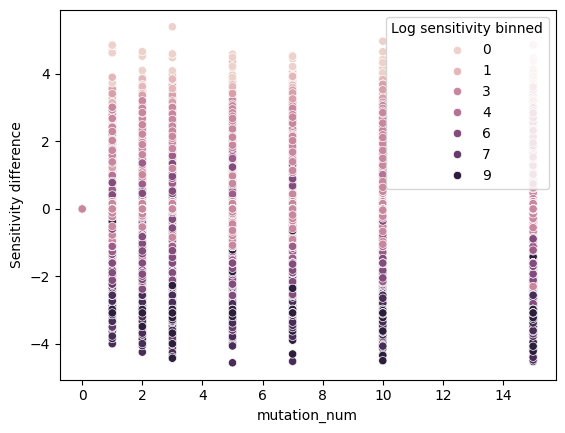

In [43]:
filt = (data['sample_name'] == 'RNA_2') # & (first_numbers > 0.1)
sns.scatterplot(data[filt], x= 'mutation_num', y='Sensitivity difference', hue=first_numbers['Log sensitivity binned'].loc[data[filt].index])

In [ ]:
sns.lineplot(data[filt], x= 'mutation_num', y='Sensitivity difference', hue='circuit_name', legend=False)


In [47]:
filt2 = (data['sample_name'] == 'RNA_2') & (data['interacting'] != '[]')
data[filt2].sort_values('Sensitivity difference')

,circuit_name,mutation_name,mutation_num,mutation_type,mutation_positions,path_to_template_circuit,index,sample_num,name,interacting,...,min_amount,overshoot,RMSE,steady_states,response_time_wrt_species-6,precision_wrt_species-6,sensitivity_wrt_species-6,sample_name,Sensitivity difference,Log sensitivity
1377074,toy_mRNA_circuit_3442,RNA_0_m15-3,15,"[7, 0, 7, 7, 8, 8, 7, 10, 4, 4, 7, 9, 11, 3, 3]","[5, 13, 7, 4, 9, 16, 8, 1, 15, 18, 19, 3, 2, 0...",./data/ensemble_mutation_effect_analysis/2024_...,51.0,9.0,toy_mRNA_circuit_3442,[[0 1]],...,199.837510,0.000000,101.749250,199.837510,inf,133639.270000,0.000007,RNA_2,-4.473731,-5.125934
2156318,toy_mRNA_circuit_4826,RNA_0_m10-6,10,"[11, 9, 11, 9, 5, 4, 11, 2, 5, 0]","[5, 17, 3, 16, 4, 7, 13, 14, 19, 15]",./data/ensemble_mutation_effect_analysis/2024_...,46.0,9.0,toy_mRNA_circuit_4826,[[0 1]],...,151.861530,0.000000,98.330960,151.861530,inf,79620.170000,0.000013,RNA_2,-4.309268,-4.901023
280286,toy_mRNA_circuit_1495,RNA_2_m2-3,2,"[0, 4]","[14, 9]",./data/ensemble_mutation_effect_analysis/2024_...,123.0,9.0,toy_mRNA_circuit_1495,[[1 2]],...,14.238653,0.000000,8.287888,14.239119,inf,160545.190000,0.000006,RNA_2,-4.242481,-5.205597
2435189,toy_mRNA_circuit_821,RNA_0_m15-5,15,"[8, 7, 7, 7, 6, 6, 10, 11, 10, 11, 1, 7, 11, 1...","[15, 9, 16, 2, 0, 3, 18, 10, 11, 17, 7, 13, 12...",./data/ensemble_mutation_effect_analysis/2024_...,53.0,9.0,toy_mRNA_circuit_821,[[0 1]],...,199.780750,0.000000,184.366320,199.780750,inf,46594.707000,0.000021,RNA_2,-4.215324,-4.668337
795521,toy_mRNA_circuit_241,RNA_0_m10-3,10,"[2, 6, 3, 9, 4, 3, 10, 10, 4, 4]","[12, 16, 17, 13, 5, 19, 4, 18, 6, 10]",./data/ensemble_mutation_effect_analysis/2024_...,43.0,9.0,toy_mRNA_circuit_241,[[1 2]],...,182.435670,0.000000,60.847847,182.435670,inf,89896.516000,0.000011,RNA_2,-4.138314,-4.953743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254985,toy_mRNA_circuit_500,RNA_2_m1-5,1,[7],[3],./data/ensemble_mutation_effect_analysis/2024_...,117.0,9.0,toy_mRNA_circuit_500,[[0 2]],...,104.703926,0.000000,33.015095,107.902930,474.94990,1.801037,0.555236,RNA_2,4.854150,-0.255523
2254979,toy_mRNA_circuit_500,RNA_2_m1-3,1,[7],[3],./data/ensemble_mutation_effect_analysis/2024_...,115.0,9.0,toy_mRNA_circuit_500,[[0 2]],...,104.703926,0.000000,33.015095,107.902930,474.94990,1.801037,0.555236,RNA_2,4.854150,-0.255523
1797719,toy_mRNA_circuit_4189,RNA_2_m15-5,15,"[6, 8, 10, 4, 5, 6, 0, 4, 1, 2, 11, 7, 0, 6, 10]","[5, 0, 11, 9, 19, 15, 2, 14, 10, 13, 1, 3, 17,...",./data/ensemble_mutation_effect_analysis/2024_...,165.0,9.0,toy_mRNA_circuit_4189,[[0 2]],...,120.681430,0.000000,77.234230,124.158100,472.94590,2.202228,0.454086,RNA_2,4.860368,-0.342862
2161220,toy_mRNA_circuit_4834,RNA_2_m10-7,10,"[4, 8, 1, 5, 9, 10, 8, 0, 1, 8]","[3, 0, 8, 7, 5, 13, 6, 12, 14, 4]",./data/ensemble_mutation_effect_analysis/2024_...,159.0,9.0,toy_mRNA_circuit_4834,[[0 2]\n [1 2]],...,31.181541,0.000015,13.192801,31.181557,32.06413,3.098851,0.322701,RNA_2,4.971055,-0.491200


In [63]:
from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols

def print_energies(d, data):
    print(d[get_true_interaction_cols(data, 'energies')].apply(np.float64).to_numpy().reshape(3, 3))

print_energies(data.loc[2161220], data)

c = data.loc[2161220]['circuit_name']

for i, r in data[filt & (data['circuit_name'] == c)].iterrows():
    print_energies(r, data)


[[  0.     0.   -13.  ]
 [  0.     0.    -7.89]
 [-13.    -7.89  -7.26]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.    -9.43]
 [  0.     0.   -12.3 ]
 [ -9.43 -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.    -9.43]
 [  0.     0.   -12.3 ]
 [ -9.43 -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.    -7.8    0.  ]
 [ -7.8    0.   -12.3 ]
 [  0.   -12.3  -14.36]]
[[  0.     0.     0.  ]
 [  0.     0.   -12.3 ]
 [ 